# 1

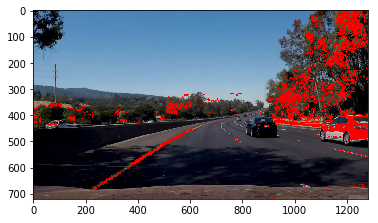

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline 
import cv2

# Read in the image
#image = mpimg.imread('test.jpg')
image = mpimg.imread('extra63.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
        
thresholds = (image[:,:,0] >60) & (image[:,:,1] > 60) & (image[:,:,2] < 50) #\
            #| (image[:,:,0] >200) & (image[:,:,1] > 200) & (image[:,:,2] > 200)

image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
mask = (image_HLS[:,:,0] > 0) & (image_HLS[:,:,0] < 30) & (image_HLS[:,:,2] > 80)
mask |= (image_HLS[:,:,1] > 190)

color_select[mask] = [250,0,0]
#image_HLS[thresholds] = [250,0,0]

plt.imshow(color_select)
#plt.imshow(image_HLS)

# Display the image                 
#plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
#mpimg.imsave("test-after.jpg", color_select)


# 2

In [ ]:
# Read in the image and print some stats
#image = mpimg.imread('test.jpg')
image = mpimg.imread('extra.jpg')
print('This image is: ', type(image), 
         'with dimesions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, ysize * 0.6]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

In [ ]:
# Read in the image
#image = mpimg.imread('test.jpg')
image = mpimg.imread('extra.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, ysize * 0.6]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)

# 3

In [145]:
#doing all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline 

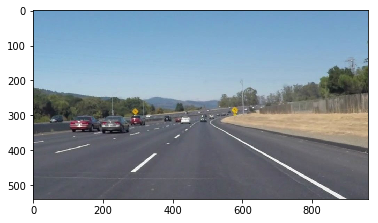

In [163]:
# Read in the image and convert to grayscale
#image = mpimg.imread('exit-ramp.jpg')
image = mpimg.imread('test.jpg')
_ = plt.imshow(image)

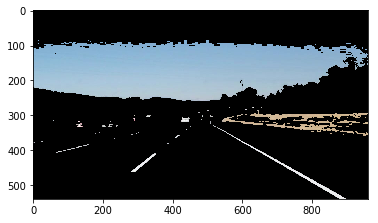

In [170]:
image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
#mask = (image_HLS[:,:,0] > 0) & (image_HLS[:,:,0] < 30) & (image_HLS[:,:,2] > 160)
mask = (image_HLS[:,:,1] > 170)

image_mask = np.copy(image)
image_mask[~mask] = [0,0,0]

_ = plt.imshow(image_mask)

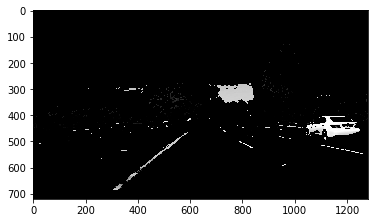

In [161]:
gray = cv2.cvtColor(image_mask, cv2.COLOR_RGB2GRAY)
_ = plt.imshow(gray, cmap='gray')

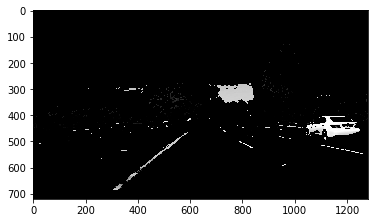

In [162]:
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 1
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
_ = plt.imshow(blur_gray, cmap='gray')

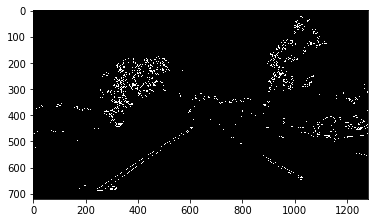

In [105]:
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 83
high_threshold = 249
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
_ = plt.imshow(edges, cmap='Greys_r')

# 4

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline 

# Read in and grayscale the image
#image = mpimg.imread('exit-ramp.jpg')
image = mpimg.imread('extra.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [ ]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 1
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
_ = plt.imshow(blur_gray, cmap='gray')

In [ ]:
# Define our parameters for Canny and apply
low_threshold = 83
high_threshold = 249
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

_ = plt.imshow(edges, cmap='Greys_r')

In [ ]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(imshape[1]/2-40, imshape[0]*0.6), (imshape[1]/2+40, imshape[0]*0.6), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

_ = plt.imshow(masked_edges, cmap='Greys_r')

In [ ]:
# Make a blank the same size as our image to draw on
line_image = np.copy(image)*0 # creating a blank to draw lines on
_ = plt.imshow(line_image)

In [ ]:
# Define the Hough transform parameters
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 20     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        slope = (y2-y1)/(x2-x1)
        if np.abs(slope) > 0.5:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)
        
_ = plt.imshow(line_image)        

In [ ]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 
_ = plt.imshow(color_edges)

In [ ]:
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
_ = plt.imshow(lines_edges)

# Drafts